<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Differences-Between-Spark-and-Dask" data-toc-modified-id="Differences-Between-Spark-and-Dask-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Differences Between Spark and Dask</a></span></li><li><span><a href="#Dask-Arrays-(Numpy-Like)" data-toc-modified-id="Dask-Arrays-(Numpy-Like)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dask Arrays (Numpy Like)</a></span></li><li><span><a href="#Dask-Dataframe-(Pandas-Like)" data-toc-modified-id="Dask-Dataframe-(Pandas-Like)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dask Dataframe (Pandas Like)</a></span></li><li><span><a href="#Dask-ML-(Sklearn-Like)" data-toc-modified-id="Dask-ML-(Sklearn-Like)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Dask ML (Sklearn Like)</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Random-Forest-Regressor-and-Grid-Search" data-toc-modified-id="Random-Forest-Regressor-and-Grid-Search-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Random Forest Regressor and Grid Search</a></span></li><li><span><a href="#Stochastic-Gradient-Descent-Classifier" data-toc-modified-id="Stochastic-Gradient-Descent-Classifier-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Stochastic Gradient Descent Classifier</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>XGBoost</a></span></li><li><span><a href="#Voting-Classifiers" data-toc-modified-id="Voting-Classifiers-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Voting Classifiers</a></span></li><li><span><a href="#Automate-Machine-Learning-with-TPOT" data-toc-modified-id="Automate-Machine-Learning-with-TPOT-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Automate Machine Learning with TPOT</a></span></li><li><span><a href="#K-Means-Clustering" data-toc-modified-id="K-Means-Clustering-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>K-Means Clustering</a></span></li></ul></li></ul></div>

# Introduction to Dask

Dask is used to efficiently perform parallel computations on a single machine using multi-core CPUs. As an example, if we have a quad core processor, Dask can effectively use all 4 cores of your system simultaneously for processing. In order to use lesser memory during computations, Dask stores the complete data on the disk, and uses chunks of data (smaller parts, rather than the whole data) from the disk for processing. During the processing, the intermediate values generated (if any) are discarded as soon as possible, to save the memory consumption. <br>

In summary, Dask can run on a cluster of machines to process data efficiently as it uses all the cores of the connected machines. <br>

- Tutorial Guide = https://www.analyticsvidhya.com/blog/2018/08/dask-big-datasets-machine_learning-python/

In [1]:
import numpy as np
import pandas as pd
import dask.array as da
import dask.dataframe as dd
import dask_ml.cluster
import dask_xgboost
import xgboost
import matplotlib.pyplot as plt
from dask.distributed import Client 
from sklearn.externals import joblib
from dask_ml.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from dask_ml.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import tpot
from tpot import TPOTClassifier
import dask_searchcv as dcv

C:\Users\hp\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\hp\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


## Differences Between Spark and Dask

![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/08/Dask-Spark.png)

## Dask Arrays (Numpy Like)

In [2]:
#using arange to create an array with values from 0 to 10
X = da.arange(20, chunks=7)
X.compute() 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [3]:
#to see size of each chunk
X.chunks

((7, 7, 6),)

In [4]:
x = np.arange(20)
y = da.from_array(x, chunks=7)
y.compute() #results in a dask array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [5]:
x = np.arange(2000)  #arange is used to create array on values from 0 to 1000
y = da.from_array(x, chunks=(50))  #converting numpy array to dask array

y.mean().compute()  #computing mean of the array

999.5

## Dask Dataframe (Pandas Like)

In [6]:
%time df = dd.read_csv("wine_data.csv")

Wall time: 27.3 ms


In [7]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,0
1,0.451036,3.282235,-2.192833,-0.597640,1.197975,-0.311320,-0.862469,0.701486,-0.115073,0.999579,-0.580068,-0.937230,0
2,0.451036,2.553300,-1.917553,-0.660699,1.026697,-0.874763,-1.092486,0.768188,0.258120,0.797958,-0.580068,-0.937230,0
3,3.073817,-0.362438,1.661085,-0.744778,0.541412,-0.762074,-0.986324,1.101694,-0.363868,0.327510,-0.580068,0.207999,0
4,0.142473,2.188833,-2.192833,-0.744778,0.569958,-1.100140,-1.446359,1.034993,1.813090,0.193097,-0.915464,-0.937230,0


In [8]:
df.count().compute()

fixed_acidity           6497
volatile_acidity        6497
citric_acid             6497
residual_sugar          6497
chlorides               6497
free_sulfur_dioxide     6497
total_sulfur_dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
style                   6497
dtype: int64

In [9]:
df.groupby('style').size().compute()

style
0    1599
1    4898
dtype: int64

In [10]:
#finding the null values in the dataset
df.isnull().sum().compute()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [11]:
X = df.drop(['style'], axis = 1)
Y = df['style']

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.30)

## Dask ML (Sklearn Like)

### Linear Regression

In [12]:
#fit the model
lr = LinearRegression()
%time lr.fit(X_Train.values.compute(), Y_Train.values.compute())

Wall time: 245 ms


LinearRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
         intercept_scaling=1.0, max_iter=100, multi_class='ovr', n_jobs=1,
         penalty='l2', random_state=None, solver='admm',
         solver_kwargs=None, tol=0.0001, verbose=0, warm_start=False)

In [13]:
#predict on test and upload
%time pred = lr.predict(X_Test.values.compute())
pred

Wall time: 92.3 ms


array([-0.0097641 , -0.03789477,  0.22419167, ...,  0.8940182 ,
        1.0457469 ,  0.90946204])

In [14]:
np.around(pred)

array([-0., -0.,  0., ...,  1.,  1.,  1.])

In [15]:
%time accuracy_score(Y_Test, np.around(pred))

Wall time: 297 ms


0.9944444444444445

### Random Forest Regressor and Grid Search

In [16]:
client = Client() # start a local Dask client

with joblib.parallel_backend('dask'):
    # Create the parameter grid based on the results of random search 
    param_grid = {
    'bootstrap': [True],
    'max_depth': [7, 11],
    'max_features': [2, 5],
    'min_samples_leaf': [3, 6],
    'min_samples_split': [6, 12],
    'n_estimators': [100, 400]
    }
    # Create a based model
    rf = RandomForestRegressor()

In [17]:
# Instantiate the grid search model
grid_search = dcv.GridSearchCV(estimator = rf, 
                               param_grid = param_grid, cv = 3)
%time grid_search.fit(X_Train, Y_Train)
grid_search.best_params_

Wall time: 36.7 s


{'bootstrap': True,
 'max_depth': 7,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 100}

In [18]:
rfr = RandomForestRegressor(bootstrap = True,
 max_depth = 11,
 max_features = 5,
 min_samples_leaf = 3,
 min_samples_split = 6,
 n_estimators = 400)

In [19]:
%time rfr.fit(X_Train, Y_Train)

Wall time: 3.09 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=6, min_weight_fraction_leaf=0.0,
           n_estimators=400, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [20]:
#predict on test and upload
%time pred = rfr.predict(X_Test)
pred

Wall time: 194 ms


array([0.        , 0.        , 0.02616361, ..., 0.99971249, 0.99957409,
       0.99970589])

In [21]:
np.around(pred)

array([0., 0., 0., ..., 1., 1., 1.])

In [22]:
%time accuracy_score(Y_Test, np.around(pred))

Wall time: 291 ms


0.996969696969697

### Stochastic Gradient Descent Classifier

In [23]:
est = SGDClassifier(loss='log', penalty='l2', tol=1e-3)

In [24]:
%time est.fit(X_Train, Y_Train)

Wall time: 269 ms


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
#predict on test and upload
%time pred = est.predict(X_Test)
pred

Wall time: 128 ms


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [26]:
%time accuracy_score(Y_Test, pred)

Wall time: 427 ms


0.9934343434343434

### XGBoost

In [27]:
params = {'objective': 'binary:logistic',
          'max_depth': 4}

In [28]:
xgc = dask_xgboost.train(client, params, X_Train, Y_Train, 
                         num_boost_round=10)

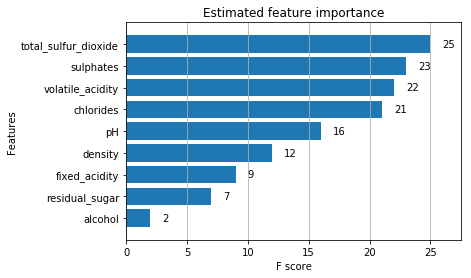

In [29]:
ax = xgboost.plot_importance(xgc, height=0.8, max_num_features=9)
ax.grid(False, axis="y")
ax.set_title('Estimated feature importance')
plt.show()

In [30]:
pred = dask_xgboost.predict(client, xgc, X_Test).persist()
pred.compute()

array([0.02207286, 0.02207286, 0.02426727, ..., 0.97483224, 0.97483224,
       0.97483224], dtype=float32)

In [31]:
fpr, tpr, _ = roc_curve(Y_Test, np.around(pred))

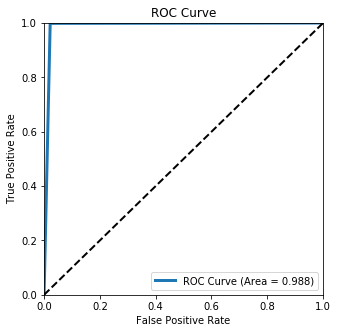

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(fpr, tpr, lw=3,
        label='ROC Curve (Area = {:.3f})'.format(auc(fpr, tpr)))
ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set(
    xlim=(0, 1),
    ylim=(0, 1),
    title="ROC Curve",
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
)
ax.legend();
plt.show()

In [33]:
%time accuracy_score(Y_Test, np.around(pred))

Wall time: 439 ms


0.9934343434343434

### Voting Classifiers

In [34]:
classifiers = [
    ('sgd', SGDClassifier(max_iter=2000)),
    ('logisticregression', LogisticRegression()),
    ('svc', SVC(gamma='auto')),
]
clf = VotingClassifier(classifiers, n_jobs=-1)

In [35]:
%time clf.fit(X_Train, Y_Train)

Wall time: 5.04 s


VotingClassifier(estimators=[('sgd', SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=2000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
   ...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=-1, voting='hard', weights=None)

In [36]:
#predict on test and upload
%time pred=clf.predict(X_Test)
pred

Wall time: 347 ms


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [37]:
%time accuracy_score(Y_Test, pred)

Wall time: 394 ms


0.9964646464646465

### Automate Machine Learning with TPOT

In [38]:
tpot = TPOTClassifier(
    generations=2,
    population_size=10,
    cv=2,
    n_jobs=-1,
    random_state=0,
    verbosity=0,
    config_dict=tpot.config.classifier_config_dict_light,
    use_dask=True,
)

In [39]:
tpot.fit(X_Train.compute(), Y_Train.compute())

TPOTClassifier(config_dict={'sklearn.naive_bayes.GaussianNB': {}, 'sklearn.naive_bayes.BernoulliNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.naive_bayes.MultinomialNB': {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0], 'fit_prior': [True, False]}, 'sklearn.tree.DecisionT...e_selection.VarianceThreshold': {'threshold': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]}},
        crossover_rate=0.1, cv=2, disable_update_check=False,
        early_stop=None, generations=2, max_eval_time_mins=5,
        max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=-1,
        offspring_size=None, periodic_checkpoint_folder=None,
        population_size=10, random_state=0, scoring=None, subsample=1.0,
        template=None, use_dask=True, verbosity=0, warm_start=False)

In [40]:
#predict on test and upload
%time pred = tpot.predict(X_Test)
pred

Wall time: 248 ms


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [41]:
%time accuracy_score(Y_Test, pred)

Wall time: 300 ms


0.9959595959595959

### K-Means Clustering

In [42]:
km = dask_ml.cluster.KMeans(n_clusters=2, init_max_iter=20)
km.fit(X.values.compute())

KMeans(algorithm='full', copy_x=True, init='k-means||', init_max_iter=20,
    max_iter=300, n_clusters=2, n_jobs=1, oversampling_factor=2,
    precompute_distances='auto', random_state=None, tol=0.0001)

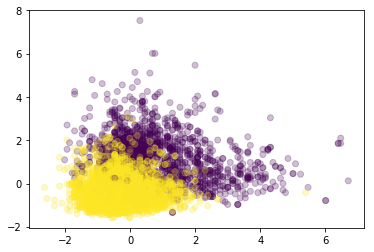

In [43]:
plt.scatter(X.values.compute()[:, 0], X.values.compute()[:, 1], marker='o', c=km.labels_[:], alpha=0.25);